In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [431]:
Customer = pd.read_csv('D:/Projects/Python/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv').drop(columns = 'No')
Customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [432]:
Repayment = pd.read_csv('D:/Projects/Python/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv').drop(columns = ['SL No:', 'Unnamed: 4']).dropna()
Repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [433]:
spend = pd.read_csv('D:/Projects/Python/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv').drop(columns = 'Sl No:')
spend

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73
1496,A68,25-Mar-06,BUS TICKET,204971.10
1497,A69,31-Mar-06,BUS TICKET,50449.44
1498,A70,23-Mar-06,BUS TICKET,80593.94


## 1. In the above dataset,

### a. In case age is less than 18, replace it with mean of age values.

In [434]:
Customer.loc[Customer.Age < 18, 'Age'] = Customer.Age.mean()

In [435]:
Customer.loc[Customer.Age < 18, 'Age']

Series([], Name: Age, dtype: float64)

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [436]:
Customer_spend = pd.merge(left = Customer, right = spend, on= 'Customer', how = 'inner')

In [437]:
Customer_spend.loc[Customer_spend.Amount > Customer_spend.Limit, 'Amount'] = Customer_spend.Limit/2

In [438]:
Customer_spend.loc[Customer_spend.Amount > Customer_spend.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [439]:
Customer_Repayment = pd.merge(left = Customer, right = Repayment, on = 'Customer', how = 'inner')

In [440]:
Customer_Repayment.loc[Customer_Repayment.Amount > Customer_Repayment.Limit, 'Amount'] = Customer_Repayment.Limit

In [441]:
Customer_Repayment.loc[Customer_Repayment.Amount > Customer_Repayment.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


## 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [442]:
Customer.Customer.nunique()

100

### b. How many distinct categories exist?

In [443]:
Customer.Segment.nunique()

5

### c. What is the average monthly spend by customers?

In [444]:
spend.Month = pd.to_datetime(spend.Month, format = '%d-%b-%y')

In [445]:
spend['Monthly'] = spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
spend['Yearly'] = spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [446]:
spend.groupby(['Yearly', 'Monthly'])[['Amount']].mean()

Amount
Yearly Monthly                 
2004   April      235272.037143
       February   221215.270000
       January    251712.068664
       March      232146.119286
       May        217539.236429
       November   270486.397857
       September  310923.383571
2005   April      252181.326429
       August     233734.634286
       December   147503.060000
       February   229802.279821
       January    292741.372857
       July       229116.663571
       June       262688.112857
       May        245696.515429
       November   286143.322857
       October    194568.640714
       September  188666.202143
2006   April      232468.967553
       August     240699.717143
       December   270470.980714
       February   253858.260714
       January    282058.006429
       July       287505.098929
       June       177252.386429
       March      247166.084654
       May        236162.740357
       November   182841.290000
       October    236136.335000
       September  158520.090714

### d. What is the average monthly repayment by customers?

In [447]:
Repayment.Month = pd.to_datetime(Repayment.Month, format = '%d-%b-%y')

In [448]:
Repayment['Monthly'] = Repayment.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
Repayment['Yearly'] = Repayment.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [449]:
Repayment.groupby(['Yearly', 'Monthly'])[['Amount']].mean()

Amount
Yearly Monthly                 
2004   April      259141.679000
       February   256702.630741
       January    243489.649786
       March      252585.280667
       May        226162.720800
       November   209592.238000
       September  184487.848750
2005   April      212688.631333
       August     264430.921622
       December   320379.335833
       February   238829.265123
       January    240548.098148
       July       239871.479167
       June       210199.818333
       May        263207.367857
       November   256695.120000
       October    219849.956667
       September  247700.170000
2006   April      275472.251889
       August     224143.992500
       December   252736.569167
       February   284489.565128
       January    293475.389167
       July       257936.383243
       June       251990.453333
       March      240851.266814
       May        256920.884943
       November   199399.197407
       October    260765.480000
       September  262533.880833

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [450]:
Customer_spend_Repayment = pd.merge(left = Customer_spend, right = Repayment, on = 'Customer', how = 'inner', suffixes = ('_spend', '_Repayment'))

In [451]:
Profit = Customer_spend_Repayment.groupby(['Yearly', 'Monthly'])[['Amount_spend', 'Amount_Repayment']].sum()
Profit['Monthly Profit'] = Profit.Amount_Repayment - Profit.Amount_spend
Profit['Interest Earned'] = (2.9 * Profit['Monthly Profit']) / 100
Profit

Amount_spend  Amount_Repayment  Monthly Profit  \
Yearly Monthly                                                     
2004   April      1.194516e+08      2.285403e+08    1.090887e+08   
       February   7.613922e+07      1.602419e+08    8.410268e+07   
       January    1.088357e+09      1.699210e+09    6.108525e+08   
       March      5.594171e+07      8.974470e+07    3.380298e+07   
       May        8.800456e+07      1.411594e+08    5.315485e+07   
       November   5.504612e+07      7.860290e+07    2.355678e+07   
       September  5.144278e+07      8.016122e+07    2.871844e+07   
2005   April      9.366405e+07      1.747894e+08    8.112539e+07   
       August     1.361400e+08      2.477449e+08    1.116049e+08   
       December   4.348638e+07      9.944533e+07    5.595895e+07   
       February   5.890557e+08      9.416163e+08    3.525606e+08   
       January    1.324129e+08      1.810333e+08    4.862042e+07   
       July       3.995653e+07      7.997268e+07    4.001615e+07   
       June       1.174019e+08      2.213774e+08    1.039755e+08   
       May        7.149030e+08      1.099197e+09    3.842944e+08   
       November   1.532278e+08      2.763119e+08    1.230841e+08   
       October    3.140993e+07      6.027830e+07    2.886837e+07   
       September  3.195551e+07      7.530449e+07    4.334898e+07   
2006   April      3.229722e+08      6.093666e+08    2.863944e+08   
       August     5.849630e+07      7.167032e+07    1.317402e+07   
       December   4.585222e+07      7.087702e+07    2.502480e+07   
       February   1.654843e+08      2.903280e+08    1.248436e+08   
       January    5.127574e+07      8.974491e+07    3.846917e+07   
       July       1.444093e+08      2.245720e+08    8.016271e+07   
       June       5.302118e+07      6.914431e+07    1.612313e+07   
       March      7.393854e+08      1.115725e+09    3.763400e+08   
       May        3.297954e+08      5.434823e+08    2.136869e+08   
       November   1.124836e+08      1.355832e+08    2.309955e+07   
       October    5.285823e+07      7.890924e+07    2.605102e+07   
       September  5.395681e+07      8.083199e+07    2.687518e+07   

                  Interest Earned  
Yearly Monthly                     
2004   April         3.163572e+06  
       February      2.438978e+06  
       January       1.771472e+07  
       March         9.802865e+05  
       May           1.541491e+06  
       November      6.831466e+05  
       September     8.328349e+05  
2005   April         2.352636e+06  
       August        3.236542e+06  
       December      1.622810e+06  
       February      1.022426e+07  
       January       1.409992e+06  
       July          1.160468e+06  
       June          3.015290e+06  
       May           1.114454e+07  
       November      3.569438e+06  
       October       8.371827e+05  
       September     1.257121e+06  
2006   April         8.305437e+06  
       August        3.820465e+05  
       December      7.257193e+05  
       February      3.620465e+06  
       January       1.115606e+06  
       July          2.324719e+06  
       June          4.675707e+05  
       March         1.091386e+07  
       May           6.196920e+06  
       November      6.698869e+05  
       October       7.554795e+05  
       September     7.793803e+05

### f. What are the top 5 product types?

In [452]:
spend.Type.value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g. Which city is having maximum spend?

In [453]:
Customer_spend.groupby('City')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(1)

,Amount
City,
COCHIN,45963513.5


### h. Which age group is spending more money?

In [454]:
Customer_spend['Age Group'] = pd.cut(Customer_spend.Age, bins = np.arange(18, 88, 8), labels = ['18-26', '26-34', '34-42', '42-50', '50-58', '58-66', '66-74', '74-82'])

In [455]:
Customer_spend.groupby('Age Group')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(1)

,Amount
Age Group,
42-50,53242390.7


### i. Who are the top 10 customers in terms of repayment?

In [456]:
Customer_Repayment.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [457]:
Customer_spend.Month = pd.to_datetime(Customer_spend.Month, format = '%d-%b-%y')
Customer_spend['Yearly'] = Customer_spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [458]:
City_Wise_Spend = Customer_spend.pivot_table(index = ['City', 'Yearly'], columns = 'Product', values = 'Amount', aggfunc = 'sum')
City_Wise_Spend

Product                   Gold    Platimum      Silver
City       Yearly                                     
BANGALORE  2004     9289878.54  1112732.30  1291852.58
           2005    12892362.99   912284.97   830612.34
           2006    12030611.09   685831.27  1415480.94
BOMBAY     2004     6987853.53   897264.94   532089.03
           2005     8983018.28   711804.94   508988.54
           2006     7917144.31   972130.01  1092833.80
CALCUTTA   2004     7477140.98  2037690.30   500006.00
           2005    10303355.80  4434696.31   440147.06
           2006    11167532.77  3589606.66  1157956.42
CHENNAI    2004     1059618.50  3535652.38   282056.86
           2005     3740945.58  5053956.32   377184.49
           2006     2704288.62  5024923.40   350009.50
COCHIN     2004     7315850.15  3419904.07   814229.62
           2005    12110613.03  4960921.71   652269.38
           2006    10499142.38  4920592.29  1269990.87
DELHI      2004     2806495.00   283512.89   768172.30
           2005     1964845.27   494157.86   612311.21
           2006     2957103.32   176788.72   854899.97
PATNA      2004     2072567.90  1113069.60   756684.10
           2005     3252615.77  2883231.07   950094.19
           2006     2276181.69  1256137.65   700005.00
TRIVANDRUM 2004     2415102.84  2161676.67   209667.48
           2005     1240375.85  3601443.30   269912.99
           2006     2735710.87  2147403.75   555862.12

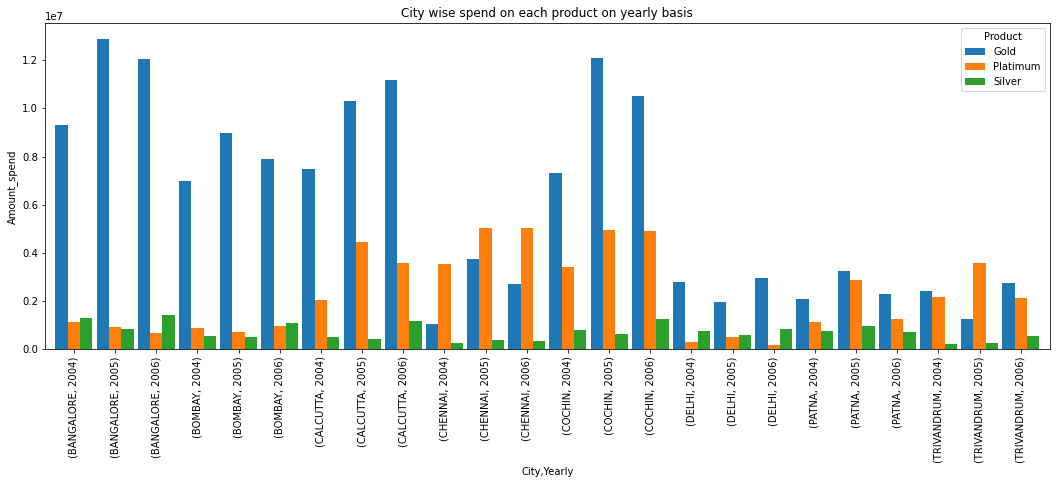

In [459]:
City_Wise_Spend.plot(kind = 'bar', width = 0.9, figsize = (18,6))
plt.title('City wise spend on each product on yearly basis')
plt.ylabel('Amount_spend')
plt.show()

## 4. Create graphs for

### a. Monthly comparison of total spends, city wise

In [460]:
Customer_spend['Monthly'] = Customer_spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
City_Wise_Monthly_Spend = Customer_spend.pivot_table(index = 'City', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
City_Wise_Monthly_Spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


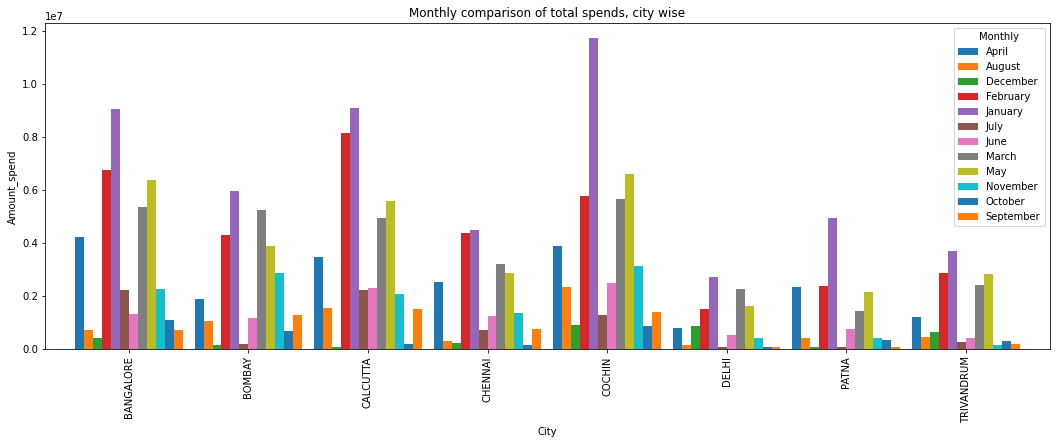

In [461]:
City_Wise_Monthly_Spend.plot(kind = 'bar', width = 0.9, figsize = (18,6))
plt.title('Monthly comparison of total spends, city wise')
plt.ylabel('Amount_spend')
plt.show()

### b. Comparison of yearly spend on air tickets

In [462]:
Yearly_Spend_On_Air_Tickets = Customer_spend.loc[Customer_spend.Type == 'AIR TICKET', ['Yearly', 'Amount']].groupby('Yearly').sum()
Yearly_Spend_On_Air_Tickets

,Amount
Yearly,
2004,4357225.35
2005,10550152.21
2006,5248469.56


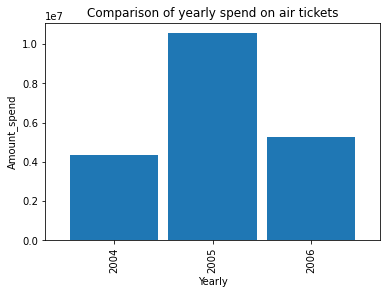

In [463]:
Yearly_Spend_On_Air_Tickets.plot(kind ='bar', width = 0.9, legend = None)
plt.title('Comparison of yearly spend on air tickets')
plt.ylabel('Amount_spend')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [464]:
Product_Wise_Monthly_Spend = Customer_spend.pivot_table(index = 'Product', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
Product_Wise_Monthly_Spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


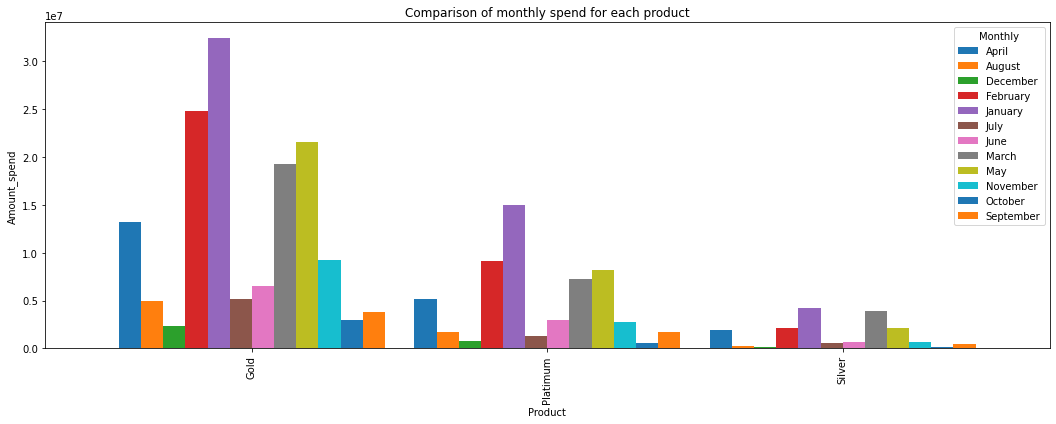

* We can see from the above graph that out of all months, highest sales are in January for all the Products


In [465]:
Product_Wise_Monthly_Spend.plot(kind = 'bar', width = 0.9, figsize = (18,6))
plt.title('Comparison of monthly spend for each product')
plt.ylabel('Amount_spend')
plt.show()
print('* We can see from the above graph that out of all months, highest sales are in January for all the Products')

## 5. Write user defined PYTHON function to perform the following analysis:

### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [466]:
Customer_Repayment.Month = pd.to_datetime(Customer_Repayment.Month, format = '%d-%b-%y')
Customer_Repayment['Monthly'] = Customer_Repayment.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
Customer_Repayment['Yearly'] = Customer_Repayment.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [467]:
def Top_10_Customers(product, timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product == 'Gold' and timeperiod == 'Yearly' :
        pivot = Customer_Repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns = 'Yearly', values = 'Amount', aggfunc = 'sum')
        result = pivot.loc[('Gold', ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']), :]
    elif product == 'Silver' and timeperiod == 'Yearly' :
        pivot = Customer_Repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns = 'Yearly', values = 'Amount', aggfunc = 'sum')
        result = pivot.loc[('Silver', ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']), :]
    elif product == 'Platinum' and timeperiod == 'Yearly' :
        pivot = Customer_Repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns = 'Yearly', values = 'Amount', aggfunc = 'sum')
        result = pivot.loc[('Platinum', ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']), :]
    elif product == 'Gold' and timeperiod == 'Monthly' :
        pivot = Customer_Repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
        result = pivot.loc[('Gold', ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']), :]
    elif product == 'Silver' and timeperiod == 'Monthly' :
        pivot = Customer_Repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
        result = pivot.loc[('Silver', ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']), :]
    elif product == 'Platinum' and timeperiod == 'Monthly' :
        pivot = Customer_Repayment.pivot_table(index = ['Product', 'City', 'Customer'], columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
        result = pivot.loc[('Platinum', ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']), :]
    return result

In [475]:
Top_10_Customers('Gold', 'Monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        BOMBAY     A12       1220387.18  1201928.94  526225.8